In [1]:

import pandas as pd
import pyarrow as pa
import os
import zipfile
import matplotlib.pyplot as plt 
from collections import Counter
import numpy as np
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
import pylab
import scipy.stats as stats

pd.options.display.float_format = '{:.2f}'.format

In [2]:
#pip freeze > requirements.txt
#aaaagggg
os.getcwd()
os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')

In [3]:
file = pd.read_csv(os.getcwd()+ '\Complete_SEDS.csv')
file1=file
codes = pd.read_csv(os.getcwd()+ '/residential_sector_codes.csv')
codes.head(1)

,CLHCK
0,CLRCB


In [56]:
empty_rows = file1[file1.isna().any(axis=1)]

In [4]:
file1['Year'] = pd.to_datetime(file1['Year'], format='%Y')
file1=file1[~(file1['StateCode']=='US')]

In [59]:
file1['Data'].head(1)

0   0.00
Name: Data, dtype: float64

In [6]:
## take each unique variable in the file
	#Iterate over it and join them in 1 big dataframe
 

In [7]:
pqr = codes['CLHCK'].unique() #Taking the unique list of codes
abc = len(pqr) #The length of codes
new_list_of_titles = []
dfs = []
for i in pqr:
	if i not in new_list_of_titles:
		new_list_of_titles.append(i)
print(new_list_of_titles)




['CLRCB', 'CLRCD', 'CLRCP', 'CLRCV', 'DFRCB', 'DFRCD', 'DFRCP', 'DFRCV', 'ESRCB', 'ESRCD', 'ESRCP', 'ESRCV', 'ESRPP', 'GERCB', 'HLRCB', 'HLRCD', 'HLRCP', 'HLRCV', 'KSRCB', 'KSRCD', 'KSRCP', 'KSRCV', 'LORCB', 'NGRCB', 'NGRCD', 'NGRCP', 'NGRCV', 'PARCB', 'PARCD', 'PARCK', 'PARCP', 'PARCV', 'PERCD', 'PERCV', 'PERSB', 'PQRCB', 'PQRCD', 'PQRCP', 'PQRCV', 'SFRCB', 'SOR7P', 'SORCB', 'SOTCB', 'SOTGP', 'SOTXB', 'TERCB', 'TERCD', 'TERCV', 'TERPB', 'TNRCB', 'TNRSB', 'WDRCB', 'WDRCD', 'WDRCV', 'WDRSB', 'WDRXB']


In [8]:
general_consumption= file1[file1['MSN'].str.contains('ESRCV')]

In [9]:
# Convert new_list_of_titles to a single regex pattern
pattern1 = '|'.join(new_list_of_titles)

# Use str.contains() with the regex pattern
filtered_df11 = file1[file1['MSN'].str.contains(pattern1)]

In [10]:
merged_data = pd.merge(general_consumption, filtered_df11, on=["StateCode", "Year", "Data_Status"], how="left")


In [11]:
import pandas as pd
pivoted_data = merged_data.pivot_table(index=["StateCode", "Year", "Data_Status","MSN_x","Data_x"], columns="MSN_y", values="Data_y", aggfunc="first")
# Reset index to flatten the dataframe
pivoted_data.reset_index(inplace=True)


In [12]:
pivoted_data.head(10)

MSN_y,StateCode,Year,Data_Status,MSN_x,Data_x,CLRCB,CLRCD,CLRCP,CLRCV,DFRCB,...,TERCD,TERCV,TERPB,TNRCB,TNRSB,WDRCB,WDRCD,WDRCV,WDRSB,WDRXB
0,AK,1970-01-01,2021F,ESRCV,16.70,233.00,2.47,13.00,0.60,7932.00,...,2.30,38.90,81.80,17800.00,16912.00,1290.00,0.82,0.30,403.00,887.00
1,AK,1971-01-01,2021F,ESRCV,20.10,177.00,2.40,10.00,0.40,10433.00,...,2.34,47.70,93.80,21282.00,20418.00,1256.00,0.86,0.30,392.00,864.00
2,AK,1972-01-01,2021F,ESRCV,22.00,199.00,2.28,11.00,0.50,8220.00,...,2.49,49.00,90.80,20497.00,19681.00,1187.00,0.87,0.30,370.00,816.00
3,AK,1973-01-01,2021F,ESRCV,22.30,92.00,2.44,5.00,0.20,10014.00,...,2.73,49.80,86.20,19008.00,18263.00,1084.00,1.00,0.30,338.00,745.00
4,AK,1974-01-01,2021F,ESRCV,25.30,92.00,2.54,5.00,0.20,10041.00,...,3.44,61.50,85.40,18605.00,17871.00,1066.00,1.54,0.50,333.00,734.00
5,AK,1975-01-01,2021F,ESRCV,31.10,88.00,2.87,5.00,0.30,9441.00,...,3.23,78.10,96.10,25137.00,24166.00,1410.00,1.62,0.70,440.00,970.00
6,AK,1976-01-01,2021F,ESRCV,36.60,71.00,2.78,4.00,0.20,11656.00,...,3.49,94.00,100.30,28019.00,26954.00,1548.00,1.74,0.80,483.00,1065.00
7,AK,1977-01-01,2021F,ESRCV,44.80,69.00,2.86,4.00,0.20,13126.00,...,3.81,111.20,107.70,30394.00,29152.00,1806.00,1.96,1.10,564.00,1242.00
8,AK,1978-01-01,2021F,ESRCV,49.70,0.00,0.00,0.00,0.00,15450.00,...,4.14,134.70,116.20,33880.00,32520.00,1978.00,2.08,1.30,617.00,1361.00
9,AK,1979-01-01,2021F,ESRCV,49.20,0.00,0.00,0.00,0.00,5488.00,...,5.34,116.70,95.50,23717.00,21836.00,2735.00,2.98,2.50,854.00,1881.00


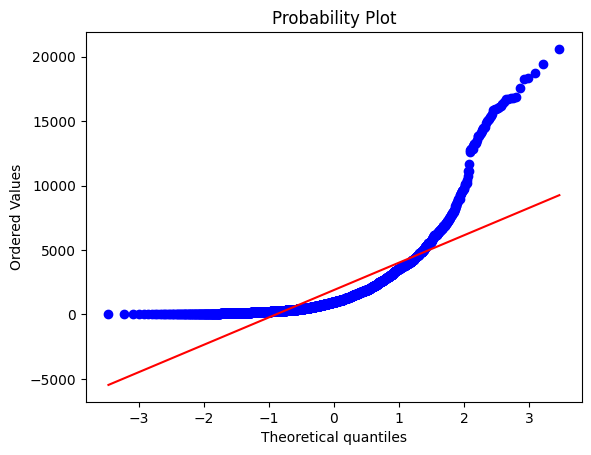

In [13]:


stats.probplot(pivoted_data['Data_x'], plot=pylab)
pylab.show()

In [14]:
needed_columns=(pivoted_data.columns[5:])

In [15]:
needed_columns1 =pivoted_data.iloc[:,4: ]

In [16]:
needed_columns1.iloc[:,:1]

MSN_y,Data_x
0,16.70
1,20.10
2,22.00
3,22.30
4,25.30
...,...
2647,315.30
2648,310.20
2649,318.40
2650,319.90


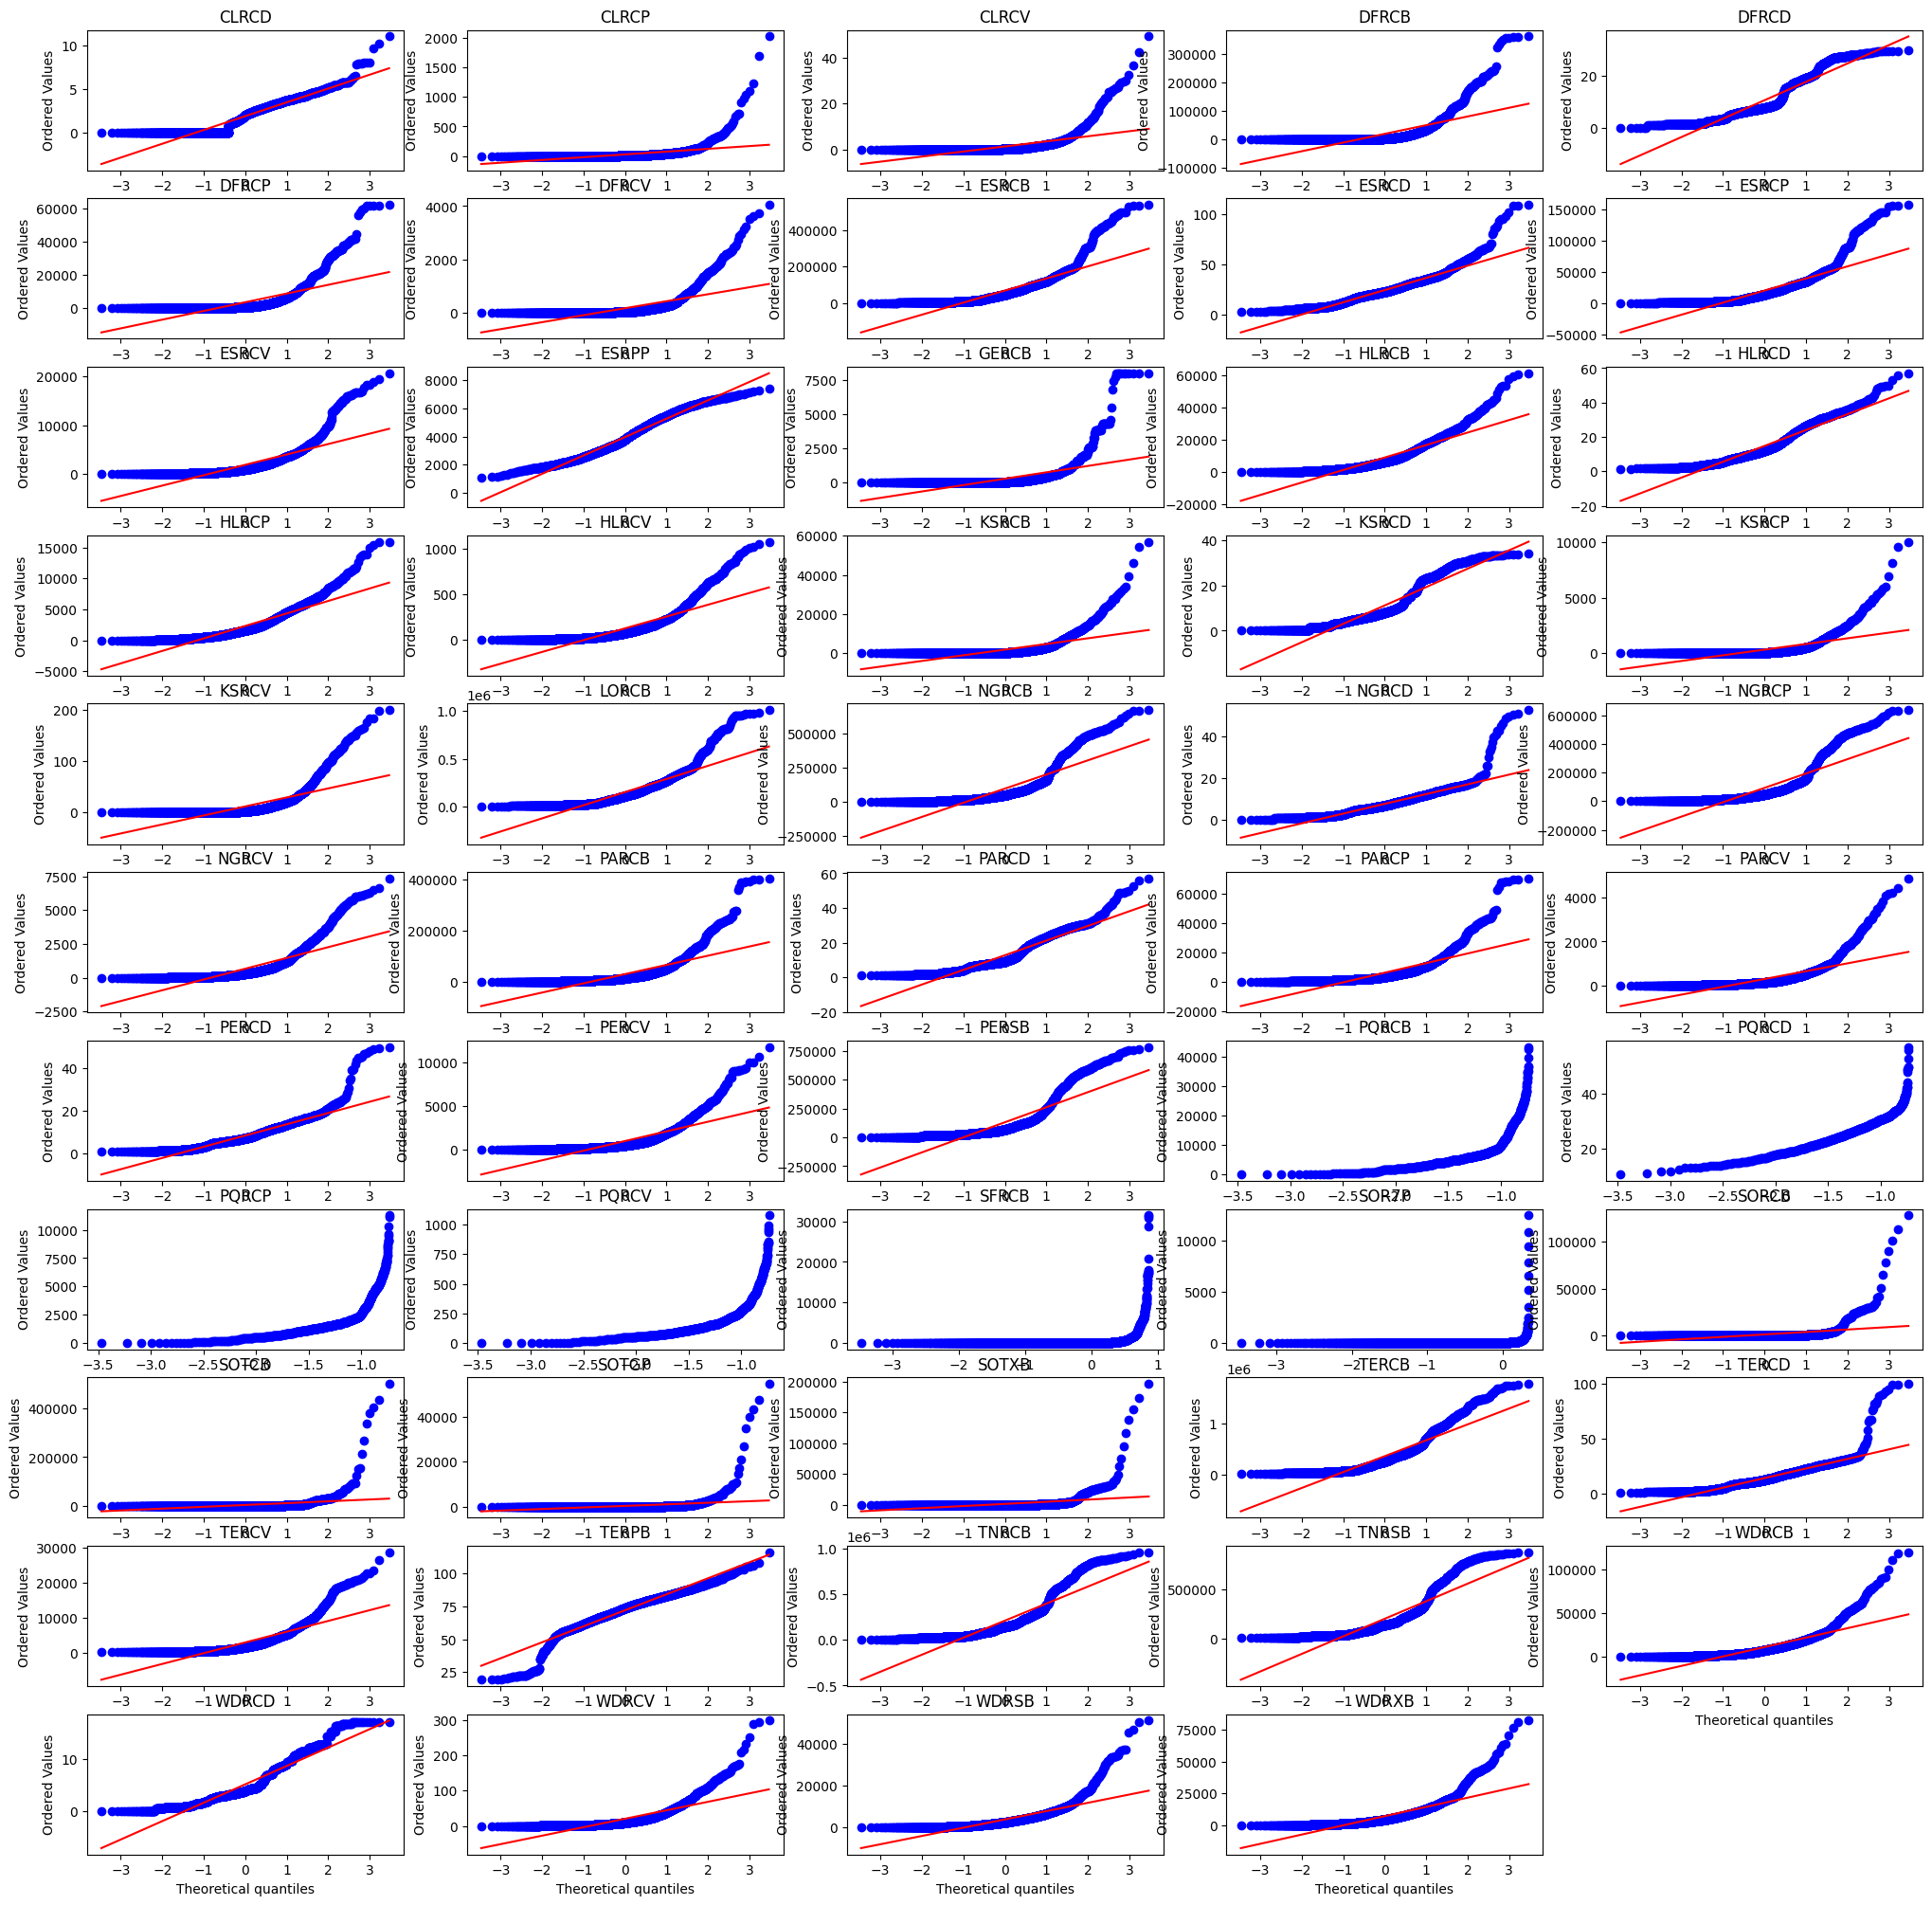

In [17]:
#This one works for plotting many plots. :) 

fig = plt.figure(figsize=(25,25))
for i,j in enumerate(needed_columns):
    if 0 < i < len(needed_columns):
        ax = fig.add_subplot(11,5 ,i)
        stats.probplot(needed_columns1[j], plot=pylab)
        ax.set_title(j)

In [19]:
needed_columns

Index(['CLRCB', 'CLRCD', 'CLRCP', 'CLRCV', 'DFRCB', 'DFRCD', 'DFRCP', 'DFRCV',
       'ESRCB', 'ESRCD', 'ESRCP', 'ESRCV', 'ESRPP', 'GERCB', 'HLRCB', 'HLRCD',
       'HLRCP', 'HLRCV', 'KSRCB', 'KSRCD', 'KSRCP', 'KSRCV', 'LORCB', 'NGRCB',
       'NGRCD', 'NGRCP', 'NGRCV', 'PARCB', 'PARCD', 'PARCP', 'PARCV', 'PERCD',
       'PERCV', 'PERSB', 'PQRCB', 'PQRCD', 'PQRCP', 'PQRCV', 'SFRCB', 'SOR7P',
       'SORCB', 'SOTCB', 'SOTGP', 'SOTXB', 'TERCB', 'TERCD', 'TERCV', 'TERPB',
       'TNRCB', 'TNRSB', 'WDRCB', 'WDRCD', 'WDRCV', 'WDRSB', 'WDRXB'],
      dtype='object', name='MSN_y')

In [23]:
## Correlation Coefficients maybe
newlist=[]
for i in needed_columns:
    newlist.append(['Annual Spending',i,(np.corrcoef(pivoted_data['Data_x'], pivoted_data[i]))])

In [100]:
corr = needed_columns1.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1.0, vmax=1.0)

MSN_y,Data_x,CLRCB,CLRCD,CLRCP,CLRCV,DFRCB,DFRCD,DFRCP,DFRCV,ESRCB,ESRCD,ESRCP,ESRCV,ESRPP,GERCB,HLRCB,HLRCD,HLRCP,HLRCV,KSRCB,KSRCD,KSRCP,KSRCV,LORCB,NGRCB,NGRCD,NGRCP,NGRCV,PARCB,PARCD,PARCP,PARCV,PERCD,PERCV,PERSB,PQRCB,PQRCD,PQRCP,PQRCV,SFRCB,SOR7P,SORCB,SOTCB,SOTGP,SOTXB,TERCB,TERCD,TERCV,TERPB,TNRCB,TNRSB,WDRCB,WDRCD,WDRCV,WDRSB,WDRXB
MSN_y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Data_x,1.000000,-0.072788,-0.170513,-0.078876,-0.061162,0.056089,0.396455,0.056906,0.235589,0.930369,0.379376,0.930369,1.000000,0.220367,0.550996,0.396933,0.437919,0.396933,0.702393,-0.005296,0.387577,-0.005301,0.167883,0.889537,0.490798,0.350586,0.489276,0.709039,0.123462,0.470090,0.157047,0.432954,0.349117,0.675721,0.442578,0.505531,0.146870,0.505524,0.636325,-0.030983,0.398255,0.587282,0.493166,0.425230,0.557073,0.827487,0.393362,0.962190,-0.191315,0.697009,0.690901,0.341193,0.344160,0.566683,0.431048,0.257957
CLRCB,-0.072788,1.000000,0.053670,0.998730,0.887033,0.371776,-0.236037,0.371251,0.073415,0.014282,-0.226345,0.014282,-0.072788,-0.209712,-0.078876,0.132723,-0.246352,0.132722,-0.097081,0.477871,-0.212482,0.477876,0.227044,0.040371,0.276132,-0.231009,0.277845,-0.001878,0.408728,-0.252143,0.410110,0.040662,-0.238167,0.012954,0.360994,nan,nan,nan,nan,0.220907,-0.050123,-0.051096,-0.041761,-0.035255,-0.049523,0.188318,-0.242731,-0.047075,0.070431,0.279142,0.281705,0.186873,-0.242023,-0.086933,0.083998,0.227315
CLRCD,-0.170513,0.053670,1.000000,0.057048,0.197500,0.212304,-0.428412,0.211605,0.104034,-0.089696,-0.247763,-0.089697,-0.170513,-0.208849,-0.227421,-0.065149,-0.390784,-0.065142,-0.238963,0.162737,-0.421030,0.162738,0.235994,-0.046587,0.033306,-0.210841,0.035024,-0.044415,0.197602,-0.462508,0.185881,0.020073,-0.288315,-0.028594,0.090915,nan,nan,nan,nan,0.058134,-0.130422,-0.095725,-0.132013,-0.137015,-0.118712,0.001743,-0.337205,-0.132057,0.107444,0.037505,0.035634,0.166931,-0.429108,-0.169176,0.116793,0.179436
CLRCP,-0.078876,0.998730,0.057048,1.000000,0.887982,0.364692,-0.239744,0.364168,0.066387,0.007240,-0.230435,0.007240,-0.078876,-0.213181,-0.080699,0.133677,-0.250435,0.133676,-0.101295,0.468458,-0.216166,0.468463,0.214413,0.032839,0.271512,-0.237182,0.273336,-0.008505,0.401548,-0.256216,0.403197,0.032824,-0.243148,0.005329,0.354782,nan,nan,nan,nan,0.228597,-0.052330,-0.052008,-0.042428,-0.035783,-0.050370,0.180315,-0.247775,-0.054231,0.075579,0.271605,0.274285,0.177247,-0.244224,-0.092774,0.073706,0.218981
CLRCV,-0.061162,0.887033,0.197500,0.887982,1.000000,0.451954,-0.259070,0.451322,0.150658,0.034710,-0.218510,0.034710,-0.061162,-0.239958,-0.095388,0.141035,-0.265746,0.141036,-0.098200,0.518641,-0.235529,0.518648,0.356375,0.068553,0.329543,-0.248132,0.331390,0.046016,0.487479,-0.285364,0.487423,0.110817,-0.256805,0.072445,0.428627,nan,nan,nan,nan,0.210588,-0.046660,-0.064043,-0.053651,-0.045937,-0.062737,0.238460,-0.265898,-0.016810,0.093933,0.340504,0.341202,0.300460,-0.271323,-0.069928,0.166616,0.347631
DFRCB,0.056089,0.371776,0.212304,0.364692,0.451954,1.000000,-0.148948,0.999995,0.699226,0.054815,0.024200,0.054814,0.056089,-0.382794,-0.097305,0.059766,-0.107317,0.059765,0.018750,0.565322,-0.143821,0.565319,0.526673,0.078305,0.345139,-0.086057,0.346625,0.246798,0.979371,-0.212587,0.958812,0.611340,-0.108179,0.392940,0.592300,0.208702,0.296980,0.208698,0.378527,0.041509,-0.016851,-0.057064,-0.048768,-0.039415,-0.044175,0.321087,-0.158118,0.185156,-0.025994,0.468903,0.474086,0.396629,-0.256105,0.140683,0.460612,0.322760
DFRCD,0.396455,-0.236037,-0.428412,-0.239744,-0.259070,-0.148948,1.000000,-0.147804,0.170487,0.243872,0.689013,0.243873,0.396455,0.386472,0.359133,0.025692,0.883589,0.025692,0.519766,-0.251606,0.940827,-0.251610,-0.038081,0.198790,0.013182,0.671601,0.011143,0.317860,-0.154833,0.903863,-0.147730,0.308846,0.750222,0.347035,-0.036662,0.024590,0.280794,0.024592,0.124343,-0.102984,0.110841,0.163562,0.161866,0.149410,0.177259,0.129358,0.691941,0.410708,-0.009223,0.064542,0.064249,-0.029186,0.929815

That is just wayy too big

In [81]:
fewer=corr[(corr <0.2)&(corr >-0.2)]

In [86]:
corr1=corr.reset_index(drop=True)

In [87]:
fewer=corr1[(corr1 <0.2)&(corr1 >-0.2)]

In [101]:
corr_result = corr.stack() #Using the corr function is neat
results_now=corr_result[(corr_result != 1.0)&((corr_result > 0.5))]

To start some values that are n

In [116]:
not_correlated_features=pd.DataFrame(results_now['Data_x']).reset_index()

In [118]:
list_of_features_to_keep=list(not_correlated_features['MSN_y'])

In [123]:
list_of_features_to_keep.append('Data_x')

Now that I have a list of features that are going to be useful I need to compare them to each other

In [124]:
shorter_now = pivoted_data[list_of_features_to_keep]

In [125]:
shorter_now

MSN_y,ESRCB,ESRCP,GERCB,HLRCV,LORCB,NGRCV,PERCV,PQRCB,PQRCP,PQRCV,SORCB,SOTXB,TERCB,TERCV,TNRCB,TNRSB,WDRCV,Data_x
0,1798.00,527.00,0.00,0.60,7074.00,9.40,22.20,NaN,NaN,NaN,0.00,0.00,24873.00,38.90,17800.00,16912.00,0.30,16.70
1,2155.00,631.00,0.00,0.70,8316.00,10.60,27.70,NaN,NaN,NaN,0.00,0.00,29598.00,47.70,21282.00,20418.00,0.30,20.10
2,2143.00,628.00,0.00,0.80,8963.00,13.00,27.00,NaN,NaN,NaN,0.00,0.00,29461.00,49.00,20497.00,19681.00,0.30,22.00
3,2342.00,686.00,0.00,1.80,9488.00,7.90,27.40,NaN,NaN,NaN,0.00,0.00,28496.00,49.80,19008.00,18263.00,0.30,22.30
4,2574.00,754.00,0.00,1.20,10533.00,6.60,36.20,NaN,NaN,NaN,0.00,0.00,29137.00,61.50,18605.00,17871.00,0.50,25.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,9459.00,2772.00,70.00,82.10,20534.00,113.10,216.30,3505.00,913.00,82.10,28.00,45.00,51214.00,531.60,30680.00,28154.00,19.00,315.30
2648,9377.00,2748.00,70.00,80.00,20438.00,113.00,216.40,3275.00,853.00,80.00,41.00,59.00,51489.00,526.60,31051.00,28500.00,21.10,310.20
2649,9722.00,2849.00,70.00,74.20,21090.00,113.30,210.10,3513.00,915.00,74.20,61.00,84.00,53932.00,528.60,32842.00,30241.00,20.60,318.40
2650,9825.00,2880.00,70.00,54.70,21385.00,114.60,186.30,2994.00,779.00,54.70,91.00,116.00,52335.00,506.20,30951.00,28498.00,15.80,319.90


For now going to apply model

In [ ]:
y_train=X1['Cost_in_Millions_of_Dollars_To_consumers'].reset_index(drop=True) # Separating all of the data
y_test=X2['Cost_in_Millions_of_Dollars_To_consumers'].reset_index(drop=True)
X_train = X1.iloc[:,3: ]
X_test = X2.iloc[:,3: ]